# Benchmark Robitaille model grid against a well-sampled & tested SED

We're using the SED from https://ui.adsabs.harvard.edu/abs/2021A%26A...646A..18Z / https://www.aanda.org/articles/aa/abs/2021/02/aa39536-20/aa39536-20.html as our test case.



In [1]:
cd /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/

/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF


In [2]:
import imp, table_loading
imp.reload(table_loading)

<module 'table_loading' from '/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/table_loading.py'>

In [3]:
from table_loading import *

In [4]:
tbl = Table.read('SPICY_withAddOns.fits')

In [5]:
# wavelength, flux, eflux, aperture
data = [
    [0.9, 0.062, 0.019, 24],
    [1.25, 2.2, 0.2, 12],
    [1.65, 8.2, 0.8, 12],
    [2.20, 17.1, 1.7, 12],
    [3.6, 18.3, 0.8, 12],
    [4.5, 17.0, 0.8, 12],
    [4.6, 17.96, 0.5, 12],
    [5.8, 12.5, 0.7, 12],
    [8.0, 6.8, 0.5, 12],
    [11.6, 4.5, 0.5, 8],
    [24, 160.6, 16.0, 30],
    [65, 4398, 274, 90],
    [70, 5555, 1000, 120],
    [100, 11000, 3000, 125],
    [160, 19000, 4000, 80],
    [250, 23700, 5000, 90],
    [350, 15000, 3000, 90],
    [450, 6700, 2500, 60],
    [500, 6200, 2000, 90],
    [850, 1000, 300, 60],
    [1110, 238, 45, 5],
    [1300, 120, 30, 5],
    [2900, 14.5, 3.0, 5],
    [8100, 1.10, 0.15, 5],
    [10300, 0.65, 0.1, 5],
    [40000, 0.05, 0.01, 5],
    [64000, 0.047, 0.02, 5],
]

A screenshot of the table, so we can cross-check with the transcribed data above:

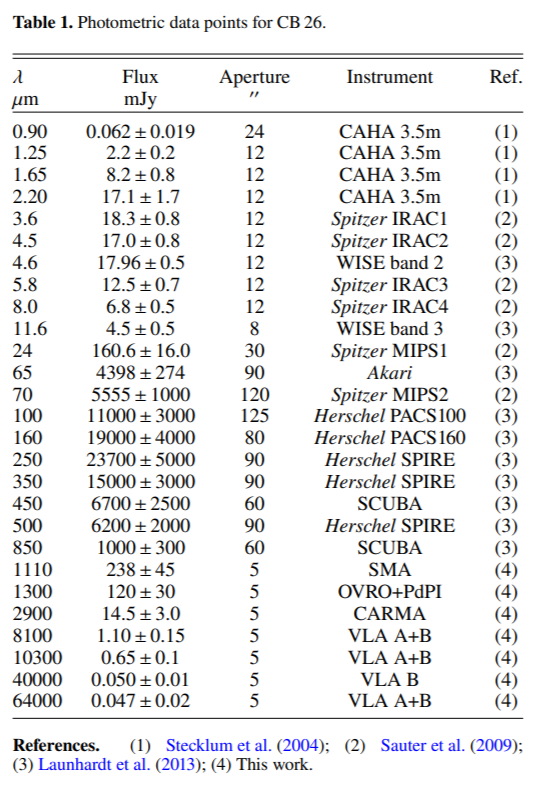

In [6]:
from IPython.display import Image

Image('sed.png')

In [7]:
cb26tbl = Table(rows=data,
                names=['wavelength', 'flux', 'eflux', 'aperture'],
                units=(u.um, u.mJy, u.mJy, u.arcsec)
               )
cb26tbl

wavelength,flux,eflux,aperture
um,mJy,mJy,arcsec
float64,float64,float64,int64
0.9,0.062,0.019,24
1.25,2.2,0.2,12
1.65,8.2,0.8,12
2.2,17.1,1.7,12
3.6,18.3,0.8,12
4.5,17.0,0.8,12
4.6,17.96,0.5,12
5.8,12.5,0.7,12


In [8]:
cb26tbl['aperture'].quantity

<Quantity [ 24,  12,  12,  12,  12,  12,  12,  12,  12,   8,  30,  90, 120,
           125,  80,  90,  90,  60,  90,  60,   5,   5,   5,   5,   5,   5,
             5] arcsec>

In [9]:
cb26tbl['flux']

0.062
2.2
8.2
17.1
18.3
17.0
17.96
12.5
6.8
4.5
160.6


In [10]:
fits = {geom:
        fit_a_source(data=cb26tbl['flux'].quantity,
             error=cb26tbl['eflux'].quantity,
             valid=np.ones(len(cb26tbl)), aperture_size=cb26tbl['aperture'].quantity,
             filters=cb26tbl['wavelength'].quantity,
                   av_range=[1,30],
                   distance_range=[110,170]*u.pc,
                     geometry=geom,
                  )
        for geom in geometries}
fit_dict = fits

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s---s-i
   Log[d] stepping     :  0.02


   Number of distances :  11

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading fluxes at 0.9 um
   Reading fluxes at 1.25 um
   Reading fluxes at 1.65 um
   Reading fluxes at 2.2 um
   Reading fluxes at 3.6 um
   Reading fluxes at 4.5 um
   Reading fluxes at 4.6 um
   Reading fluxes at 5.8 um
   Reading fluxes at 8.0 um
   Reading fluxes at 11.6 um
   Reading fluxes at 24.0 um
   Reading fluxes at 65.0 um
   Reading fluxes at 70.0 um
   Reading fluxes at 100.0 um
   Reading fluxes at 160.0 um
   Reading fluxes at 250.0 um
   Reading fluxes at 350.0 um
   Reading fluxes at 450.0 um
   Reading fluxes at 500.0 um
   Reading fluxes at 850.0 um
   Reading fluxes at 1110.0 um
   Reading fluxes at 1300.0 um
   Reading fluxes at 2900.0 um
   Reading fluxes at 8100.0 um
   Reading fluxes at 10300.0 um
   Reading fluxes at 40000.0 um
   Reading fluxes at 64000.0 um
 -----------

In [11]:
%matplotlib inline
import pylab as pl
pl.rcParams['font.size'] = 16

In [12]:
pl.style.use('dark_background')

In [13]:
%run plot_fit.py

`plot_fit` will show the default aperture, 3", as a solid line by default.

It also shows the per-aperture convolved flux as squares with size scaled by aperture size.

$$\chi^2 = \Sigma \frac{(y_i - x_i)^2}{\sigma_i^2}$$

In [14]:
minchi2 = min([np.nanmin(fits[geom].chi2) for geom in fits])
minchi2

<Quantity 434.79671644>

In [15]:
deltachi2limit = minchi2*3 if minchi2 > 3 else 9

Figure /home/adamginsburg/figures/CB26_None.png doesn't exist


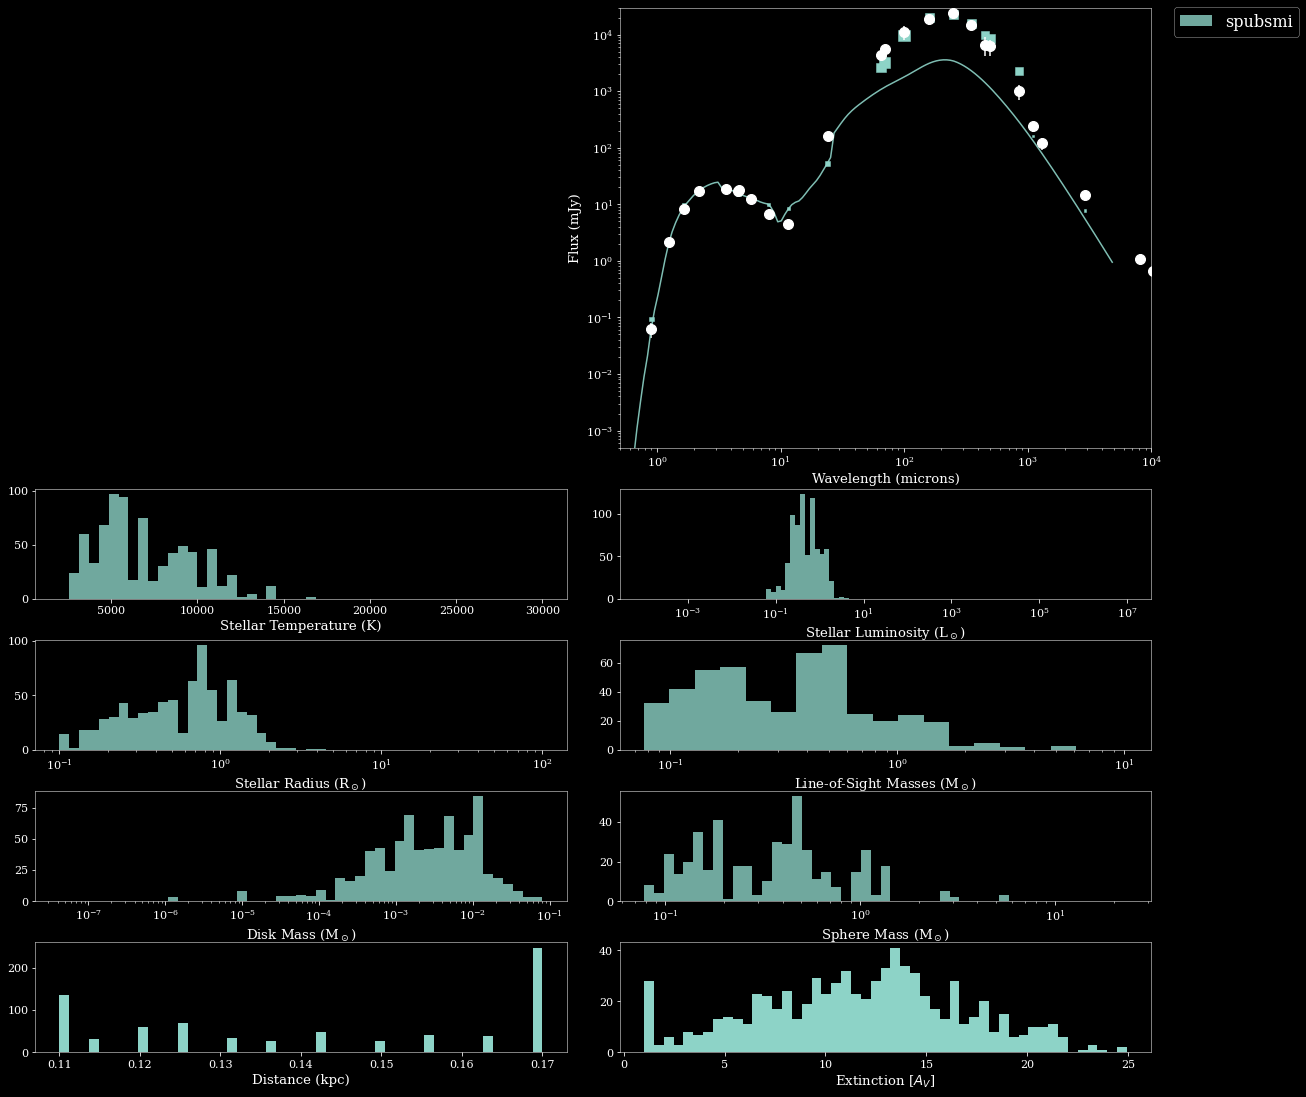

In [16]:
fit = fits['spubsmi']
plot_fit({'spubsmi': fit}, ['spubsmi'], fieldid='CB26', deltachi2limit=deltachi2limit, min_chi2=minchi2)

Figure /home/adamginsburg/figures/CB26_None.png doesn't exist


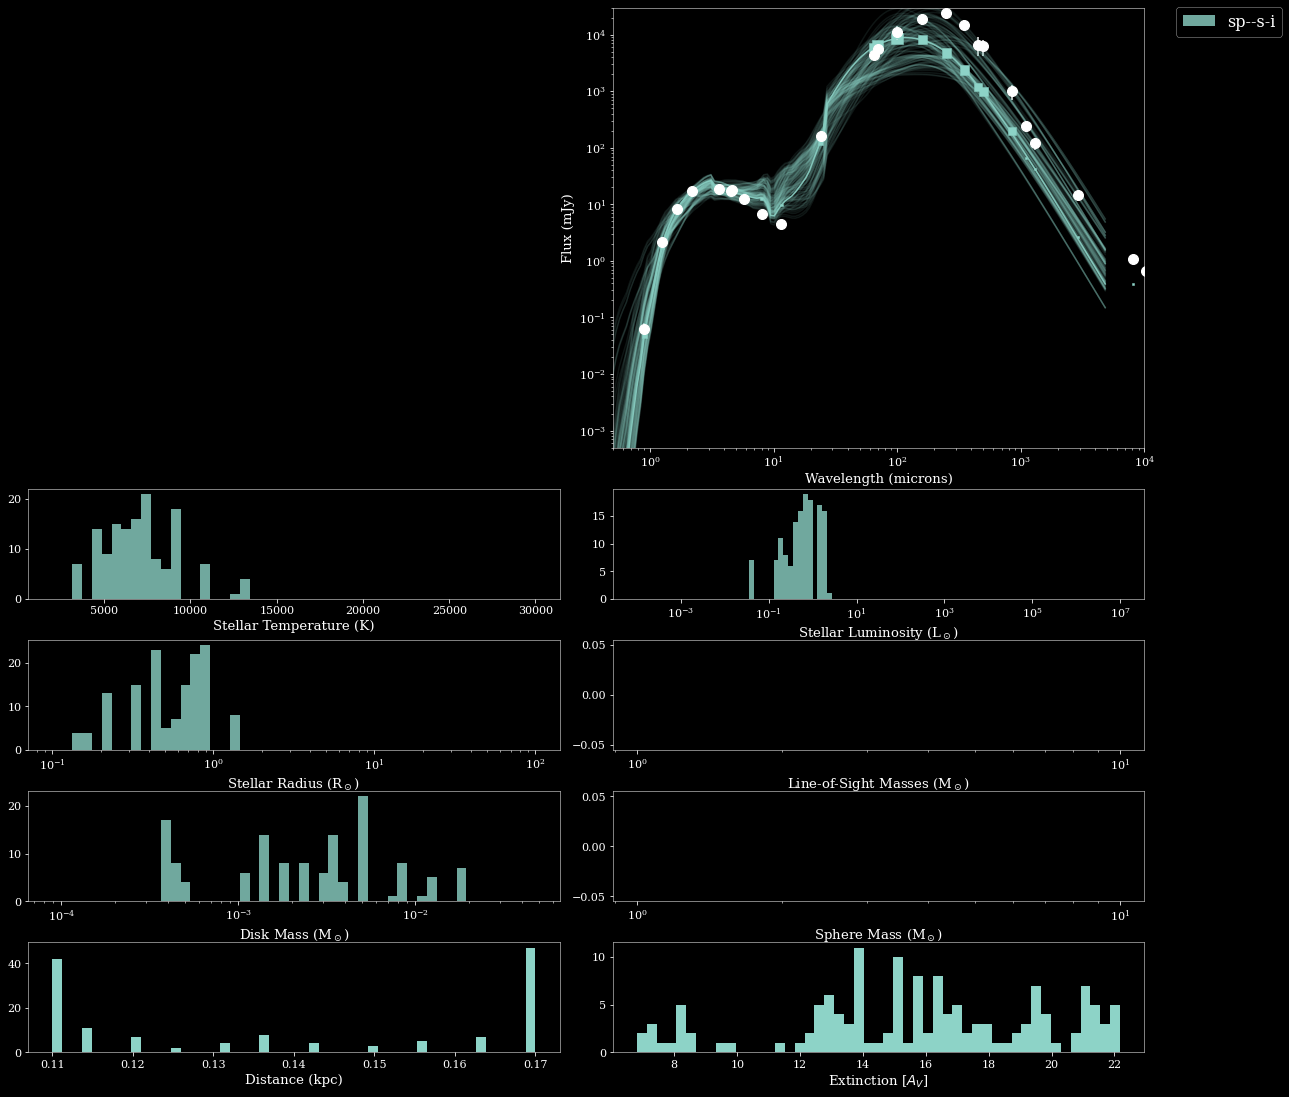

In [17]:
geo = 'sp--s-i'
fit = fits[geo]
plot_fit({geo: fit}, [geo], deltachi2limit=deltachi2limit, fieldid='CB26', show_all_models=True, min_chi2=minchi2)

In [18]:
okgeo = []
for geom in geometries:
    # we impose an _absolute_ chi^2 limit (the fitter uses a _relative_, delta chi2 limit)
    print(f"{geom}: {np.nanmin(fits[geom].chi2):12.1f}")
    if np.nanmin(fits[geom].chi2) < 1000:
        okgeo.append(geom)

s---s-i:      42128.2
s---smi:      27273.2
sp--s-i:        750.7
sp--h-i:        814.8
s-p-smi:       9228.0
s-p-hmi:       2660.8
s-pbsmi:        640.5
s-pbhmi:       1052.0
s-u-smi:       1759.5
s-u-hmi:       1937.7
s-ubsmi:       1481.5
spu-smi:        715.2
spu-hmi:        631.9
spubsmi:        701.9
spubhmi:        434.8


Figure /home/adamginsburg/figures/None_None.png doesn't exist


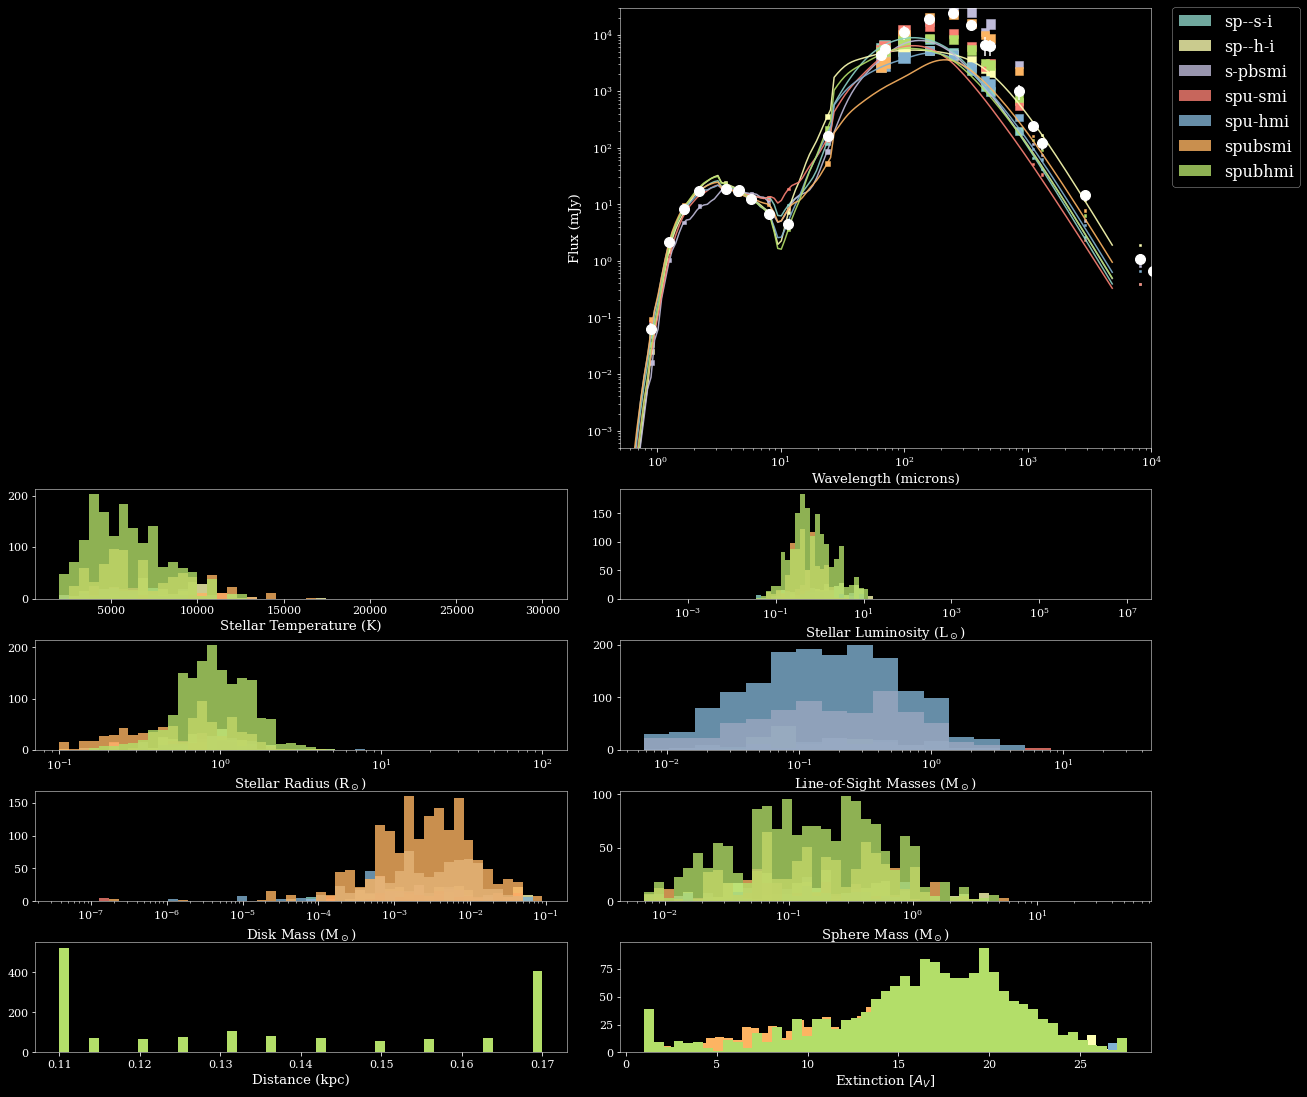

In [19]:
plot_fit(fits, okgeo, deltachi2limit=deltachi2limit, min_chi2=minchi2)

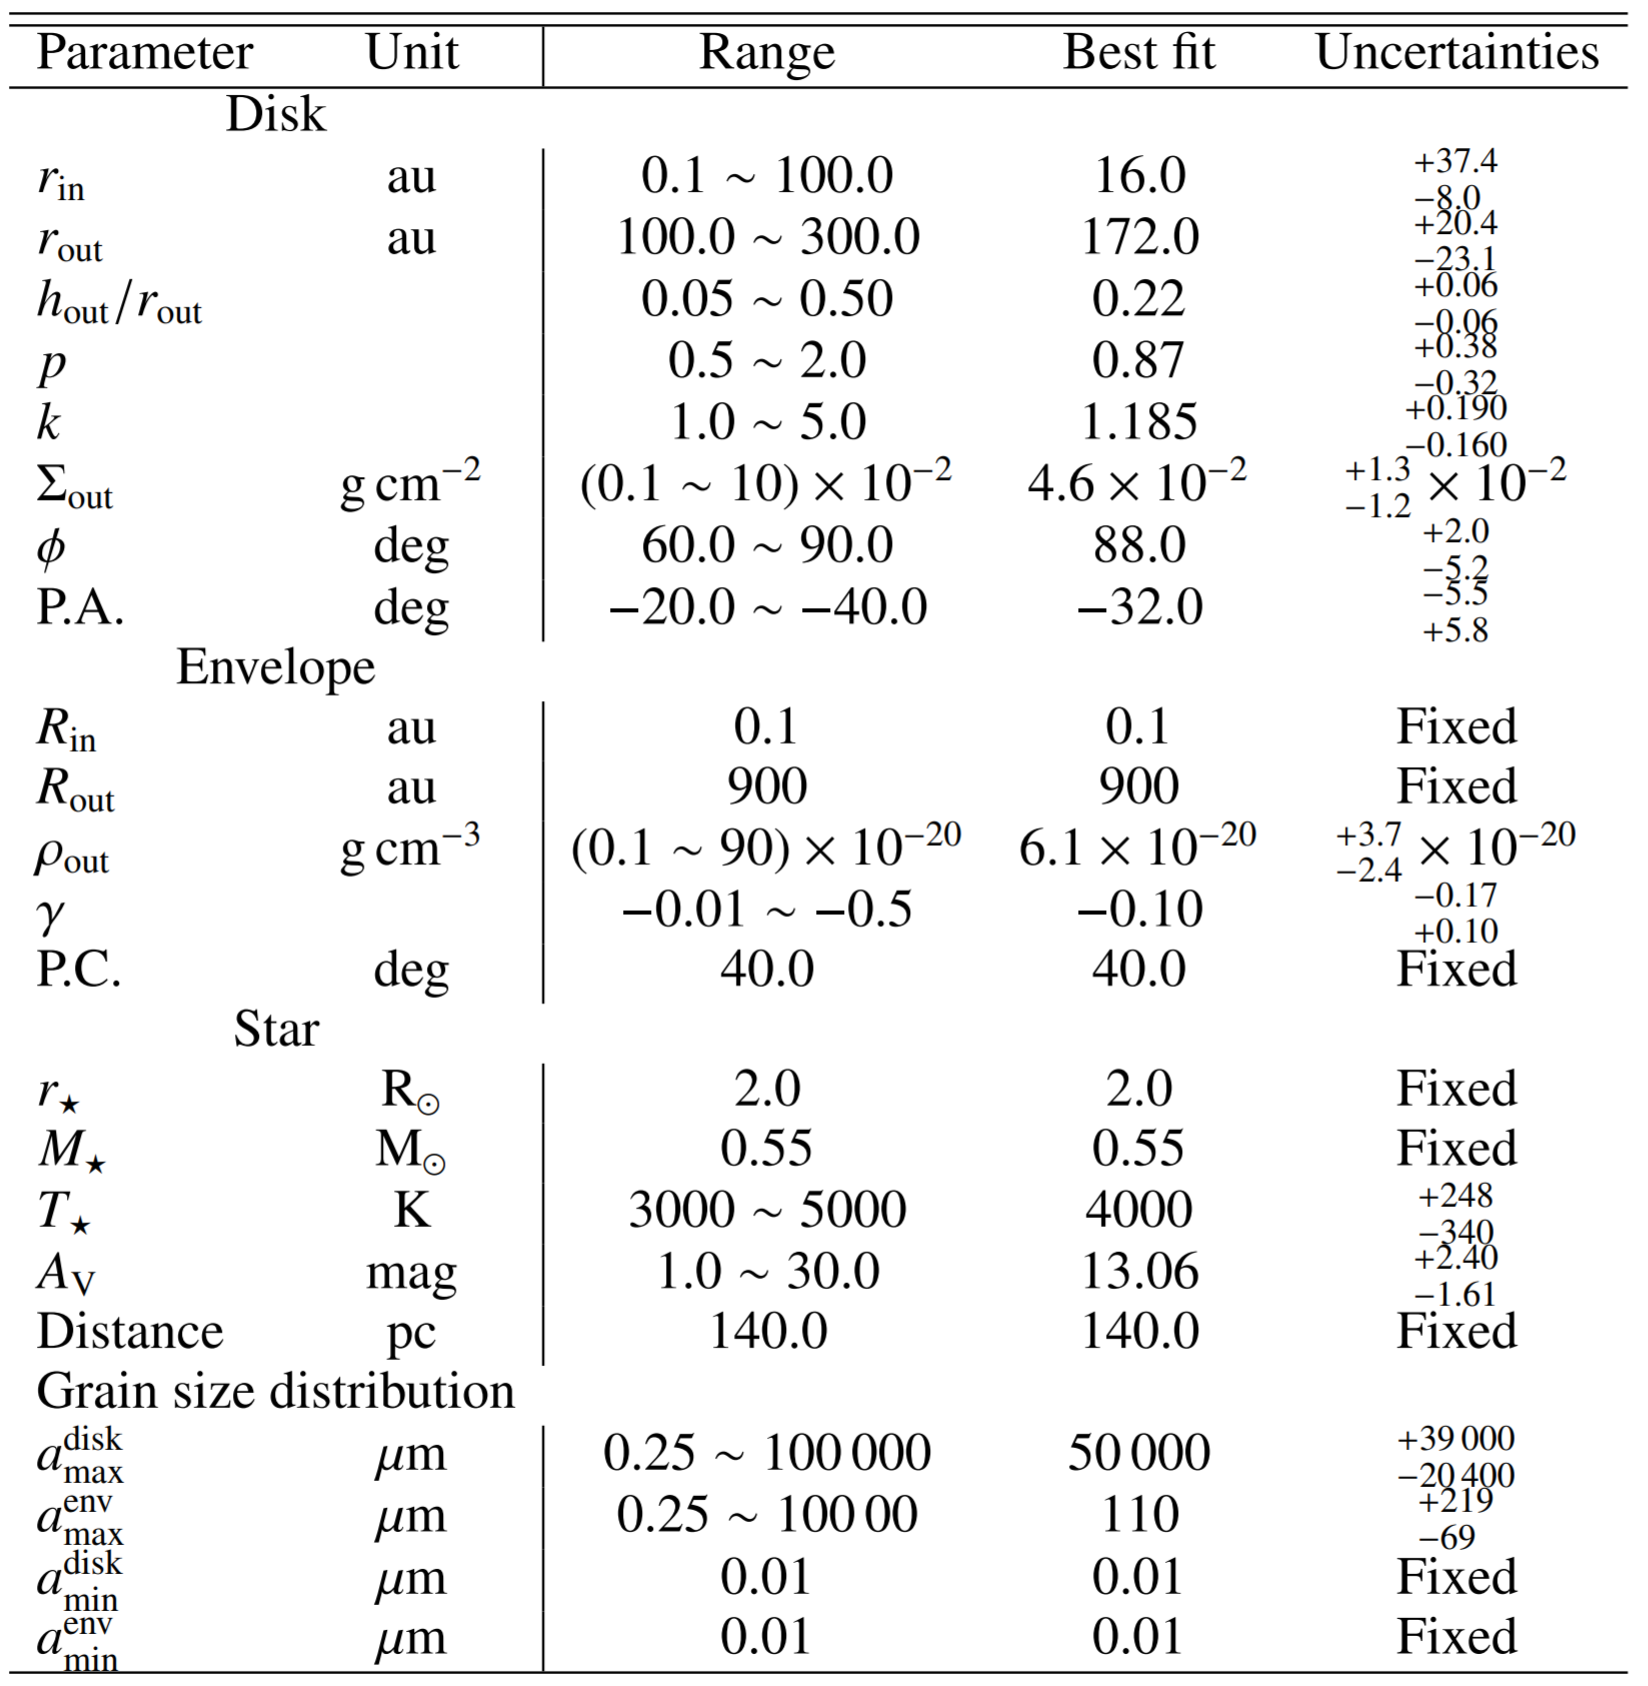

In [20]:
Image('fitpars.png', width=600)

The Robitaille models favor smaller, hotter stars - but similar-ish luminosities.

In [21]:
from astropy import constants

In [22]:
L_rob = 0.2 *u.L_sun
L_paper = ((4000*u.K)**4 * 4*np.pi*(2*u.R_sun)**2 * constants.sigma_sb).to(u.L_sun)
print(f"Robitaille: {L_rob:0.1f}, Paper: {L_paper:0.1f}, ratio rob/paper: {L_rob/L_paper:0.2f}")

Robitaille: 0.2 solLum, Paper: 0.9 solLum, ratio rob/paper: 0.22


In this plot:

 * White circles are the data
 * Green squares are the model evaluated at that specific aperture & wavelength
 * Green line is the model evaluated at the _default_ aperture

Figure /home/adamginsburg/figures/None_None.png doesn't exist


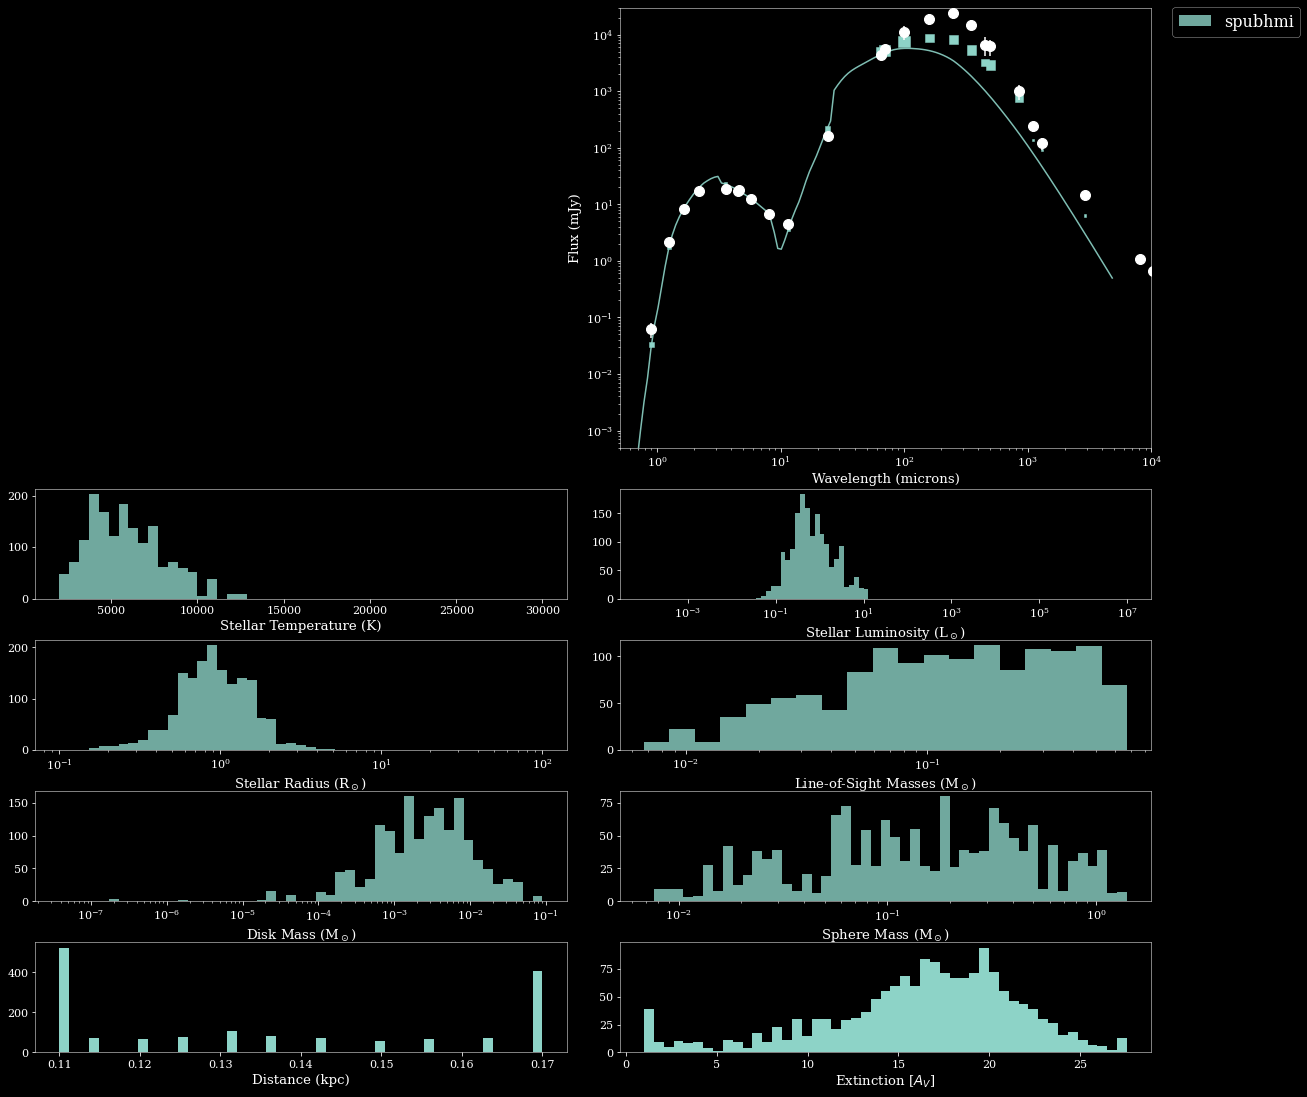

In [23]:
plot_fit(fits, ['spubhmi'], deltachi2limit=deltachi2limit, min_chi2=minchi2)

Figure /home/adamginsburg/figures/None_None.png doesn't exist


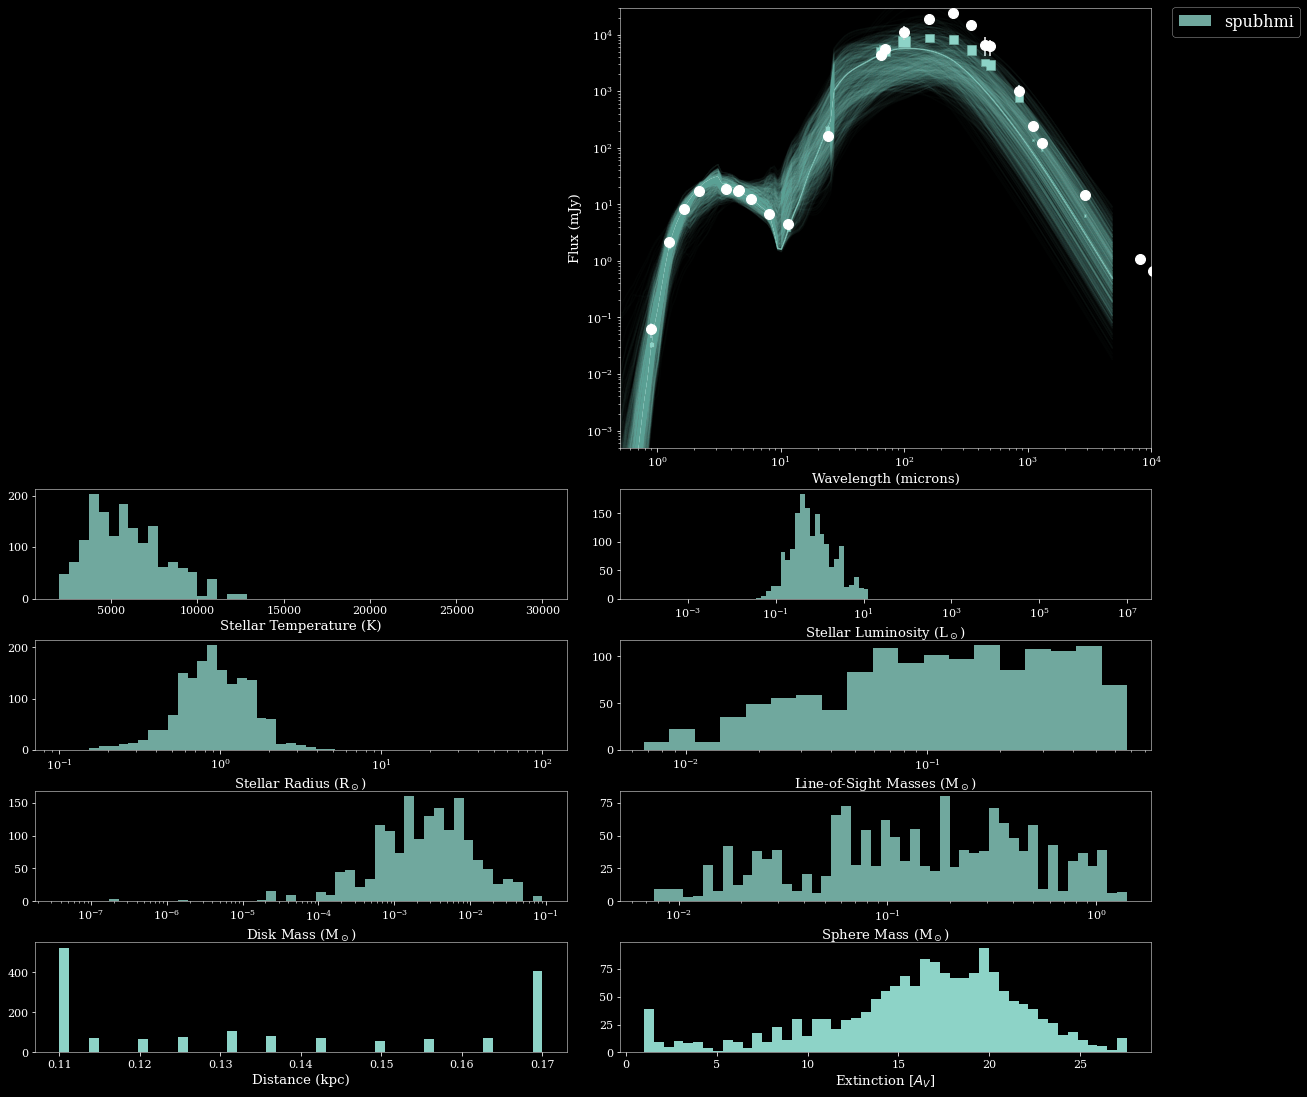

In [24]:
plot_fit(fits, ['spubhmi'], deltachi2limit=deltachi2limit, show_all_models=True, min_chi2=minchi2, alpha_allmodels=0.02)

# Look at A_V and distance vs. chi^2

The above plots tell us that:

1. Most models are "pegged" to the near near/far distance and the min/max A_V.  Models at these extremes are probably not useful (though the distance doesn't matter so much in this case).
2. There seems to be a preferred A_V of ~15 (close to the ~13 from the paper).

In [25]:
geom = 'spubhmi'

pars, data, selection = datafunction(geom, deltachi2limit, fits, min_chi2=minchi2)
fit = fits[geom]
maxchi2 = minchi2 + deltachi2limit
selection = fit.chi2 < maxchi2
len(data)

1602

Text(0.5, 0, 'Distance (kpc)')

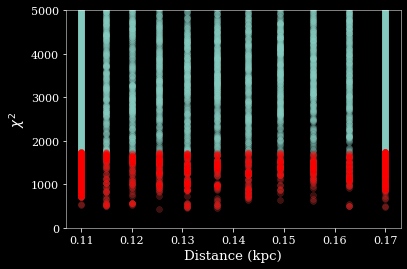

In [26]:
pl.scatter(10**fit.sc, fit.chi2, alpha=0.1)
pl.scatter(10**fit.sc[selection], fit.chi2[selection], alpha=0.2, color='r')
pl.ylim(0,5000)
pl.ylabel("$\chi^2$")
pl.xlabel("Distance (kpc)")

Text(0.5, 0, 'Extinction (A_V)')

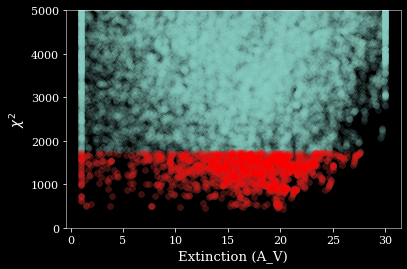

In [27]:
pl.scatter(fit.av, fit.chi2, alpha=0.1)
pl.scatter(fit.av[selection], fit.chi2[selection], alpha=0.2, color='r')
pl.ylim(0,5000)
pl.ylabel("$\chi^2$")
pl.xlabel("Extinction (A_V)")

This is a sanity check to show that the fit is significantly limiting the mass:

[]

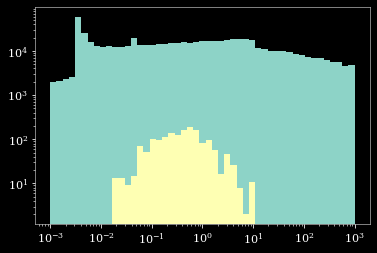

In [28]:
bins = np.logspace(-3,3)
pl.hist(pars['Sphere Masses'][:,9], bins=bins)
pl.hist(data['Sphere Masses'][:,9], bins=bins)

pl.loglog()

[]

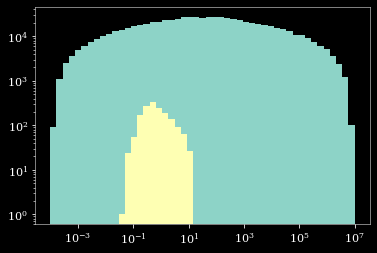

In [29]:
bins = np.logspace(-4,7)
pl.hist(pars['Model Luminosity'][:], bins=bins)
pl.hist(data['Model Luminosity'][:], bins=bins)

pl.loglog()

In [30]:
# need to check aperture sizes
robitaille_modeldir='/blue/adamginsburg/richardson.t/research/flux/robitaille_models/'
model_dir = f'{robitaille_modeldir}/{geom}'
sedcube = SEDCube.read(f"{model_dir}/flux.fits",)
sedcube.apertures

<Quantity [1.00000000e+02, 1.62377674e+02, 2.63665090e+02, 4.28133240e+02,
           6.95192796e+02, 1.12883789e+03, 1.83298071e+03, 2.97635144e+03,
           4.83293024e+03, 7.84759970e+03, 1.27427499e+04, 2.06913808e+04,
           3.35981829e+04, 5.45559478e+04, 8.85866790e+04, 1.43844989e+05,
           2.33572147e+05, 3.79269019e+05, 6.15848211e+05, 1.00000000e+06] AU>

In [31]:
sedcube.apertures[5], sedcube.apertures[9]

(<Quantity 1128.83789168 AU>, <Quantity 7847.59970351 AU>)

# Disk and Envelope parameters

In [32]:
diskpars = ['disk.mass', 'disk.rmax', 'disk.beta', 'disk.p', 'disk.h100', 'envelope.rho_0', 'envelope.rc', 'envelope.rmin', 'cavity.power', ]

# Different answer:
spubhmi grid favors a much lower disk mass than the 0.076 Msun from Zhang+

Text(0.5, 0, 'Disk Mass (M$_\\odot$)')

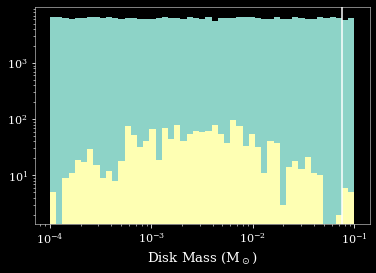

In [33]:
#bins = np.logspace(-3,3)
bins = np.logspace(-4, -1)
pl.hist(pars['disk.mass'], bins=bins)
pl.hist(data['disk.mass'], bins=bins)
pl.axvline(7.6e-2)
pl.loglog()
pl.xlabel("Disk Mass (M$_\odot$)")

## Robitaille grid favors a moderately larger envelope mass (at least for spubhmi)

S4.4 of the paper says M_env = 0.033 Msun within 900 AU and M_env = 0.22 Msun within 10^4 AU

Text(0.5, 1.0, 'Aperture 9=$10^4$ AU')

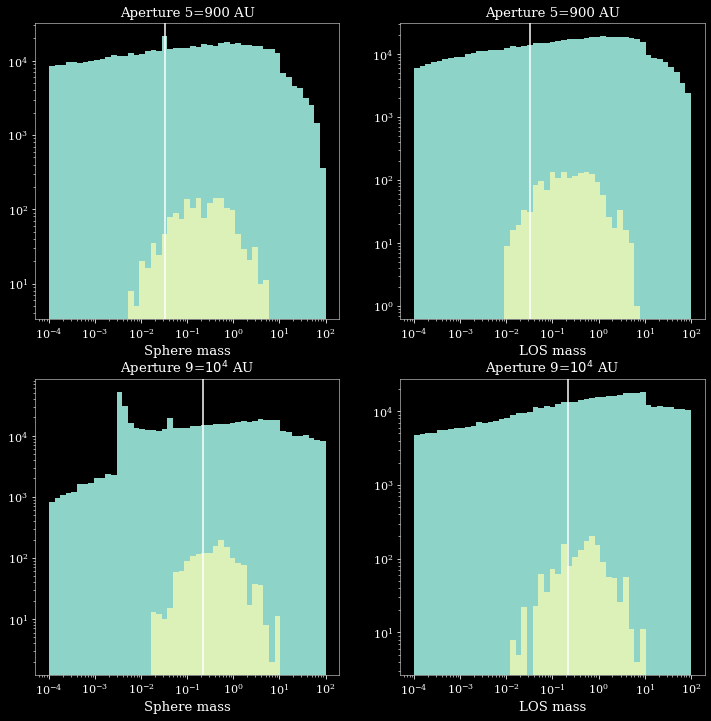

In [34]:
# mass comparisons
pl.figure(figsize=(12,12))
pl.subplot(2,2,1)
bins = np.logspace(-4, 2)
pl.hist(pars['Sphere Masses'][:,5], bins=bins)
pl.hist(data['Sphere Masses'][:,5], bins=bins, alpha=0.7)
pl.axvline(3.3e-2)
pl.loglog()
pl.xlabel("Sphere mass")
pl.title("Aperture 5=900 AU")

pl.subplot(2,2,2)
pl.hist(pars['Line-of-Sight Masses'][:,5], bins=bins)
pl.hist(data['Line-of-Sight Masses'][:,5], bins=bins, alpha=0.7)
pl.axvline(3.3e-2)
pl.loglog()
pl.xlabel("LOS mass")
pl.title("Aperture 5=900 AU")

pl.subplot(2,2,3)
pl.hist(pars['Sphere Masses'][:,9], bins=bins)
pl.hist(data['Sphere Masses'][:,9], bins=bins, alpha=0.7)
pl.axvline(0.22)
pl.loglog()
pl.xlabel("Sphere mass")
pl.title("Aperture 9=$10^4$ AU")

pl.subplot(2,2,4)
pl.hist(pars['Line-of-Sight Masses'][:,9], bins=bins)
pl.hist(data['Line-of-Sight Masses'][:,9], bins=bins, alpha=0.7)
pl.axvline(0.22)
pl.loglog()
pl.xlabel("LOS mass")
pl.title("Aperture 9=$10^4$ AU")

Text(0.5, 0, 'Disk max radius')

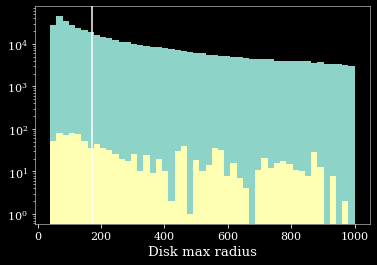

In [35]:
#bins = np.logspace(-3,3)
bins = np.linspace(40, 1000)
pl.hist(pars['disk.rmax'], bins=bins)
pl.hist(data['disk.rmax'], bins=bins)
pl.axvline(172)
pl.semilogy()
pl.xlabel("Disk max radius")

Text(0.5, 0, 'Disk power-law index $p$')

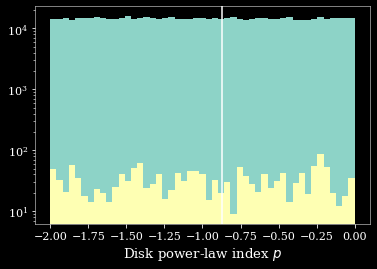

In [36]:
#bins = np.logspace(-3,3)
bins = np.linspace(-2,0)
pl.hist(pars['disk.p'], bins=bins)
pl.hist(data['disk.p'], bins=bins)
pl.axvline(-0.87)
pl.semilogy()
pl.xlabel("Disk power-law index $p$")

Text(0.5, 0, 'Disk inclination')

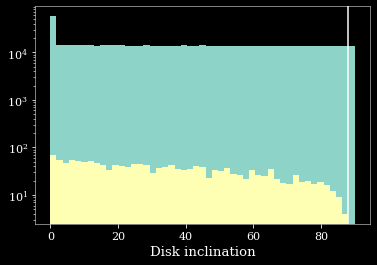

In [37]:
#bins = np.logspace(-3,3)
bins = np.linspace(0,90)
pl.hist(pars['inclination'], bins=bins)
pl.hist(data['inclination'], bins=bins)
pl.axvline(88) #Zhang number?
pl.semilogy()
pl.xlabel("Disk inclination")

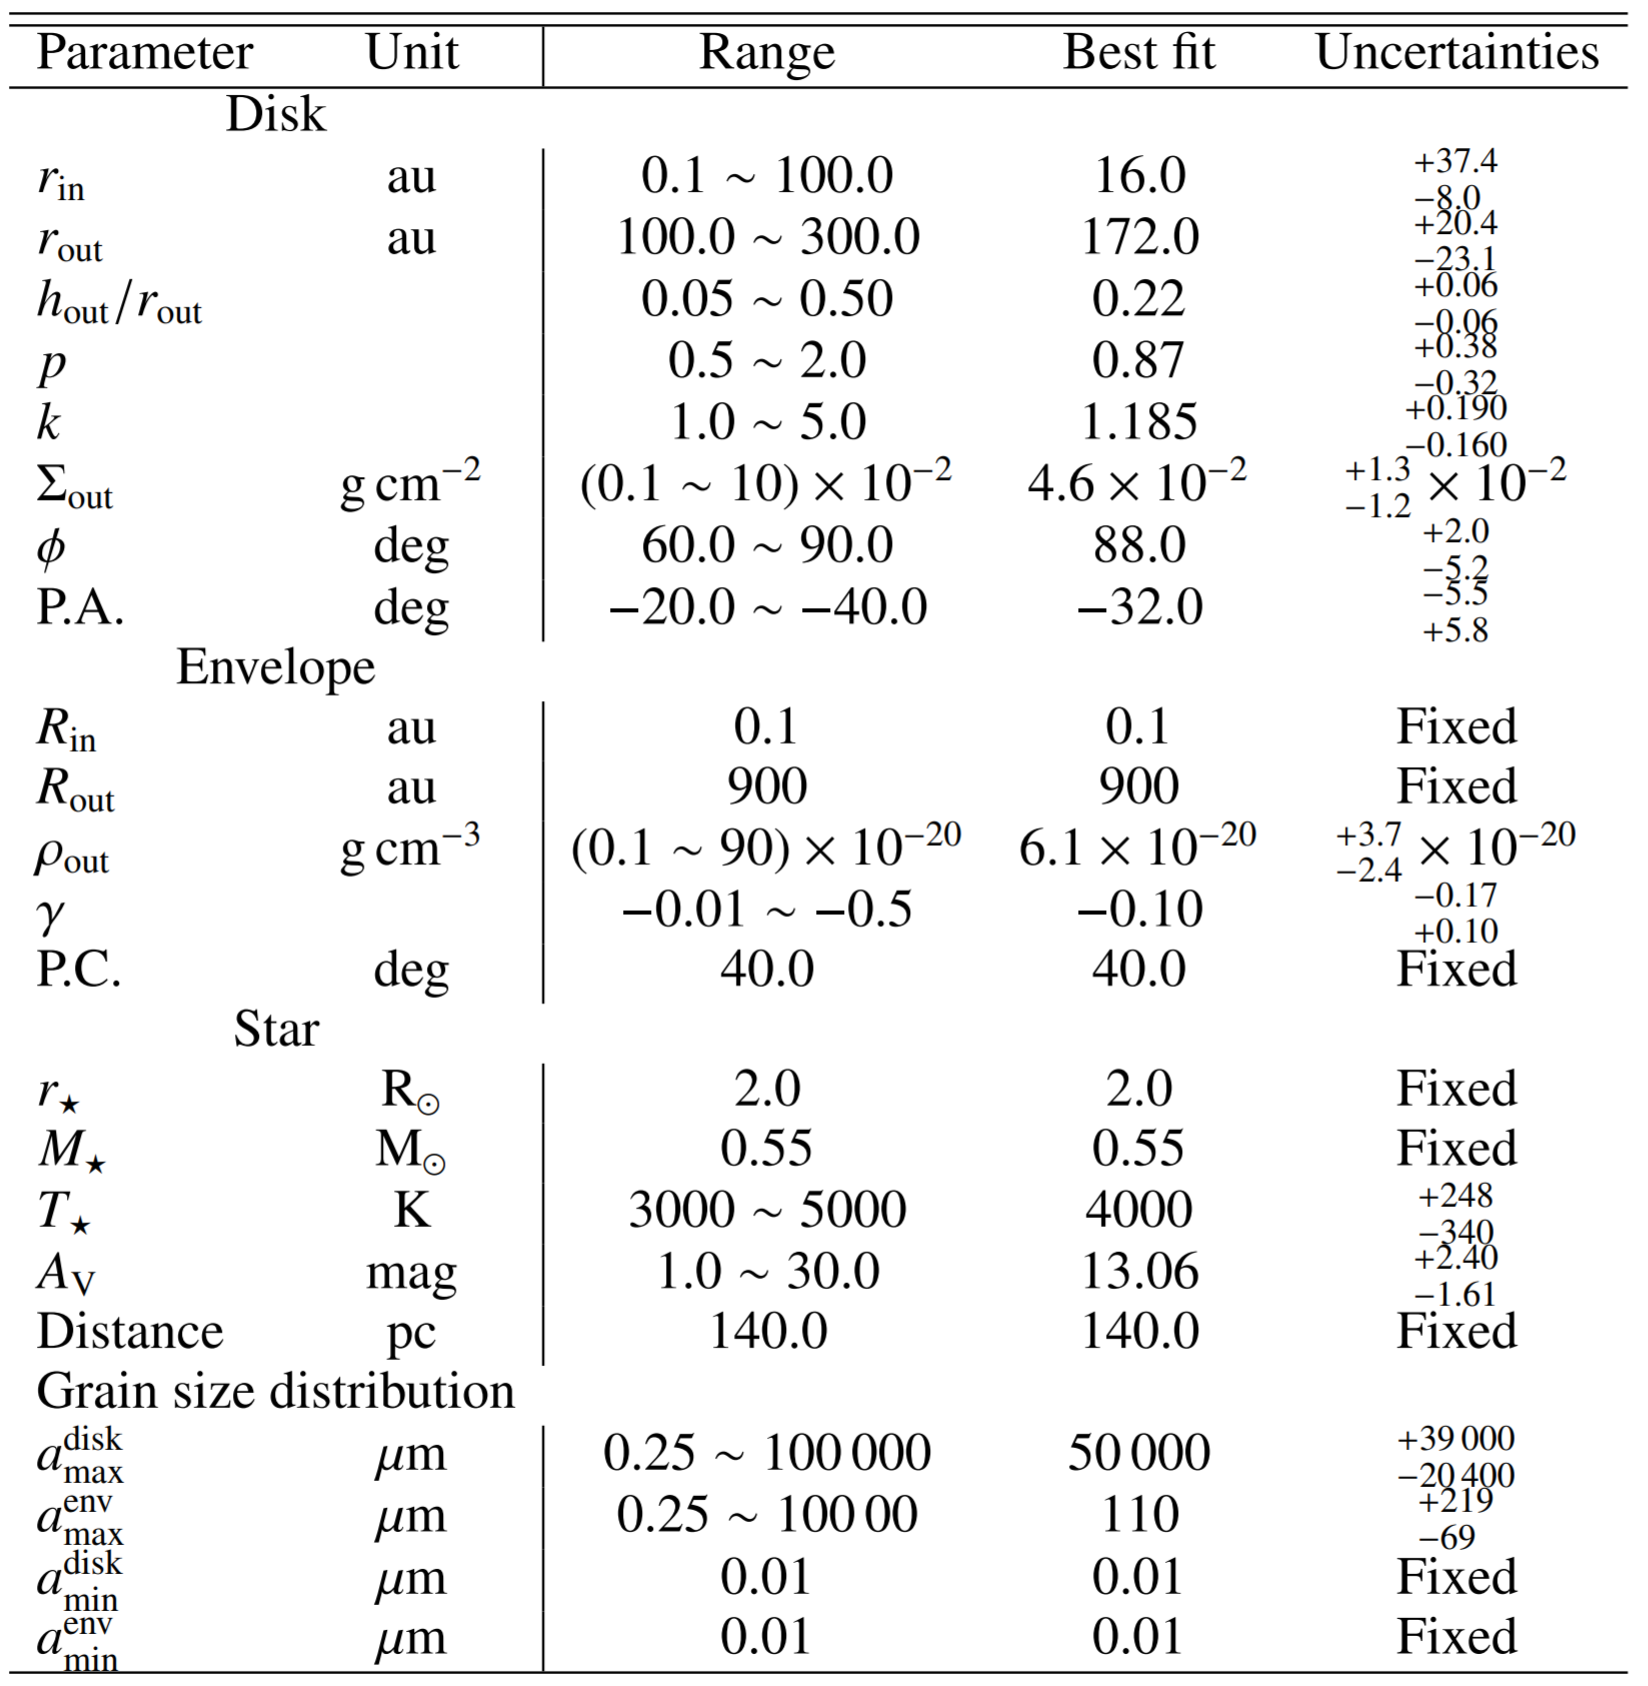

In [38]:
Image('fitpars.png', width=600)

# Compare to Optically Thin dust model

In [39]:
from dust_emissivity import dust

In [40]:
flux_1mm = 120*u.mJy
distance = 140*u.pc
optthinmass = dust.massofsnu(nu=(1110.0*u.um).to(u.GHz, u.spectral()),
                             snu=flux_1mm, distance=distance, temperature=20*u.K)
optthinmass

<Quantity 0.03121736 solMass>

In [41]:
data['disk.mass', 'Line-of-Sight Masses', 'Sphere Masses']

disk.mass,Line-of-Sight Masses [20],Sphere Masses [20]
float64,float64,float64
0.006643,0.00670557033016783 .. 0.6710594963458957,0.0068248788317994726 .. 1.4056231101549086
0.003492,0.006062951149803959 .. 1.9328104941418351,0.00217594198975824 .. 6.563152958151243
0.006643,0.007081310670027343 .. 0.6710594963455916,0.0068248788317994726 .. 1.4056231101549086
0.006643,0.007625332541384711 .. 0.6710594963454153,0.0068248788317994726 .. 1.4056231101549086
0.0008571,0.0034470961844733227 .. 18.406811239997594,0.0033872669074692715 .. 69.94118025703594
0.006643,0.008343739015205392 .. 0.6710594963452178,0.0068248788317994726 .. 1.4056231101549086
0.003492,0.00680766765688444 .. 1.9328104941418354,0.00217594198975824 .. 6.563152958151243
0.003118,0.314957808174438 .. 5.970478136972074,0.3118390826724889 .. 22.23345765711214
0.003962,0.4009341016274113 .. 76.79839581308576,0.39658513527361555 .. 290.15658328637204


## Plot: show the mass as a function of radius

We're using a 5" aperture in this case for the long-wavelength, mass-estimating scale

Text(0, 0.5, 'Mass (M$_\\odot$)')

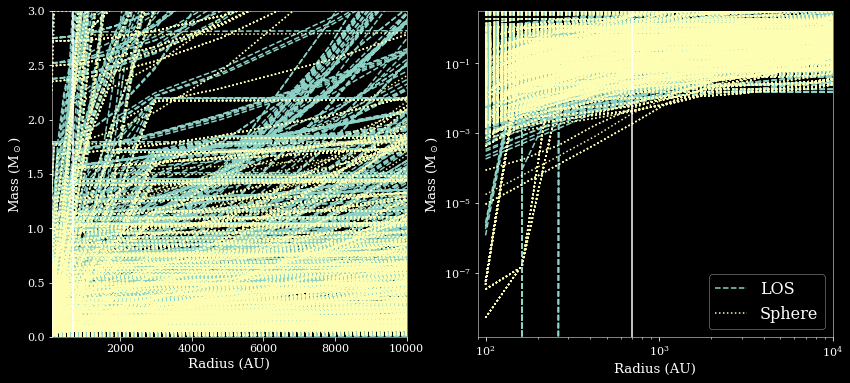

In [42]:
aperture_1mm = 5*u.arcsec

from itertools import cycle

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

pl.figure(figsize=(14,6))
pl.subplot(1,2,1)
lines1 = pl.plot(sedcube.apertures, np.array(data['Line-of-Sight Masses']).T, label='LOS', linestyle='--', color=next(colors))
lines2 = pl.plot(sedcube.apertures, np.array(data['Sphere Masses']).T, label='Sphere', linestyle=':', color=next(colors))
pl.axvline((distance * aperture_1mm).to(u.au, u.dimensionless_angles()).value)
pl.axis([90,1e4,0,3])
pl.xlabel("Radius (AU)")
pl.ylabel("Mass (M$_\odot$)")
pl.subplot(1,2,2)
pl.plot(sedcube.apertures, np.array(data['Line-of-Sight Masses']).T, label='LOS', linestyle='--', color=lines1[0].get_color())
pl.plot(sedcube.apertures, np.array(data['Sphere Masses']).T, label='Sphere', linestyle=':', color=lines2[0].get_color())
pl.axvline((distance * aperture_1mm).to(u.au, u.dimensionless_angles()).value)
pl.loglog()
pl.legend(handles=[lines1[0], lines2[0]], loc='lower right')
pl.axis([90,1e4,0,3])
pl.xlabel("Radius (AU)")
pl.ylabel("Mass (M$_\odot$)")

# 2D Flux Plots

The SEDs are calculated in a two-dimensional grid of wavelength and aperture.   Let's see where our measurements fall and how they compare.

In [43]:
obs_apertures = (cb26tbl['aperture'] * distance).to(u.au, u.dimensionless_angles())
obs_apertures                                  

<Quantity [ 3360.,  1680.,  1680.,  1680.,  1680.,  1680.,  1680.,  1680.,
            1680.,  1120.,  4200., 12600., 16800., 17500., 11200., 12600.,
           12600.,  8400., 12600.,  8400.,   700.,   700.,   700.,   700.,
             700.,   700.,   700.] AU>

In [44]:
obs_apnums = np.interp(obs_apertures, sedcube.apertures, np.arange(len(sedcube.apertures)))
obs_apnums

array([ 7.20664276,  5.78274193,  5.78274193,  5.78274193,  5.78274193,
        5.78274193,  5.78274193,  5.78274193,  5.78274193,  4.97961953,
        7.65908787,  9.97083851, 10.51043383, 10.59849931,  9.68484116,
        9.97083851,  9.97083851,  9.11284645,  9.97083851,  9.11284645,
        4.01108557,  4.01108557,  4.01108557,  4.01108557,  4.01108557,
        4.01108557,  4.01108557])

In [45]:
obs_wavs = cb26tbl['wavelength'].to(u.um)
obs_wlnums = np.interp(obs_wavs, sedcube.wav[::-1], np.arange(len(sedcube.wav))[::-1])
obs_wlnums, obs_wavs

(array([130.92014929, 125.9135503 , 121.68659925, 117.30172679,
        109.79439149, 106.39580662, 106.05467734, 102.52827342,
         97.62650087,  91.95709886,  80.87822756,  65.69638153,
         64.56796759,  59.12734292,  51.96159358,  45.16283179,
         40.03116991,  36.20515725,  34.60195472,  26.51487006,
         22.44721805,  20.03195486,   7.80744136,   0.        ,
          0.        ,   0.        ,   0.        ]),
 <Quantity [9.00e-01, 1.25e+00, 1.65e+00, 2.20e+00, 3.60e+00, 4.50e+00,
            4.60e+00, 5.80e+00, 8.00e+00, 1.16e+01, 2.40e+01, 6.50e+01,
            7.00e+01, 1.00e+02, 1.60e+02, 2.50e+02, 3.50e+02, 4.50e+02,
            5.00e+02, 8.50e+02, 1.11e+03, 1.30e+03, 2.90e+03, 8.10e+03,
            1.03e+04, 4.00e+04, 6.40e+04] um>)

In [46]:
from astropy.visualization import simple_norm

In [47]:
sedcube.apertures.min()

<Quantity 100. AU>

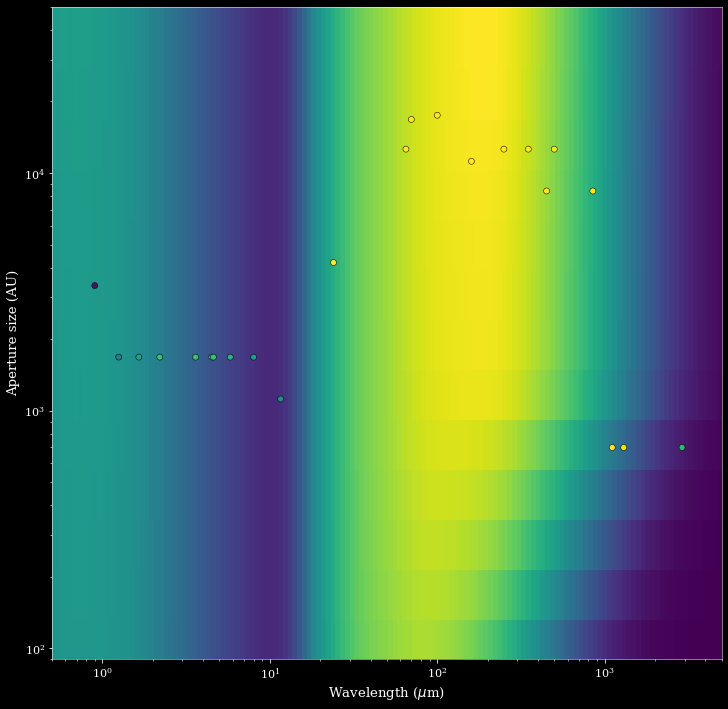

In [53]:
pl.figure(figsize=(12,12))
pl.rcParams['font.size'] = 16
ax = pl.gca()
mdl = sedcube.get_sed(data['MODEL_NAME'][0]).flux.value
norm = simple_norm(mdl, stretch='log')
ax.pcolormesh(sedcube.wav.value, sedcube.apertures.value, mdl[:,:], norm=norm)# extent=[x.value for x in [sedcube.wav.min(), sedcube.wav.max(), sedcube.apertures.min(), sedcube.apertures.max()]],
              #aspect=1./10,
              #origin='lower')
#ax.scatter(len(sedcube.wav) - obs_wlnums, obs_apnums, c=cb26tbl['flux'].to(u.mJy), norm=norm, edgecolors='w', linewidths=0.15)
_=ax.scatter(obs_wavs.value, obs_apertures.value, c=cb26tbl['flux'].to(u.mJy).value, norm=norm, edgecolors='k', linewidths=0.5)
#_=ax.axis([0.5*u.um, 1*u.cm, 90*u.au, 1e5*u.au])
ax.loglog()
_=ax.axis([0.5, 0.5e4, 90, 5e4])
_=ax.set_xlabel("Wavelength ($\mu$m)")
_=ax.set_ylabel("Aperture size (AU)")
#ax.set_xticklabels([f"{x:0.1f}" for x in np.interp(ax.get_xticks(), np.arange(len(sedcube.wav)), sedcube.wav)][::-1])
#_=ax.set_yticklabels([f"{x:0.1f}" for x in np.interp(ax.get_yticks(), np.arange(len(sedcube.apertures)), sedcube.apertures)])

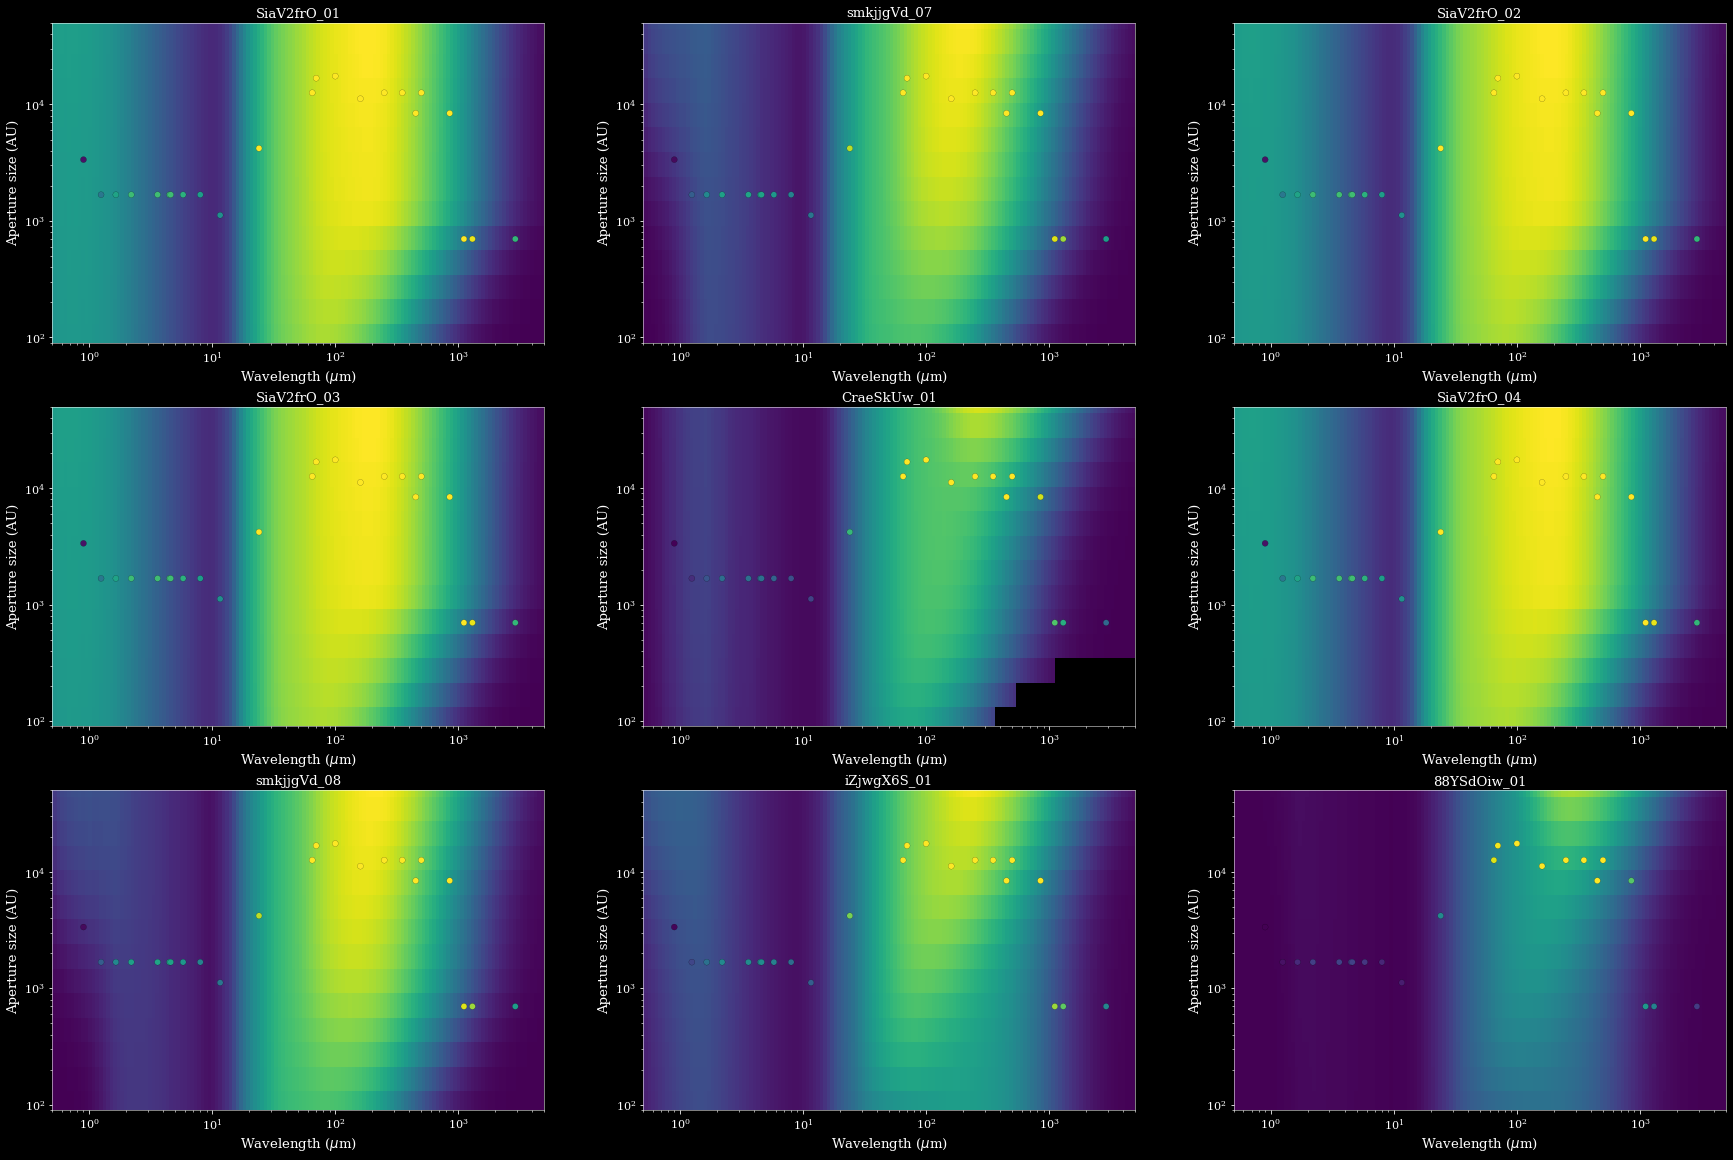

In [54]:
pl.figure(figsize=(30,20))
for ii in range(9):
    ax = pl.subplot(3,3,ii+1)

    ax.set_title(data['MODEL_NAME'][ii])
    mdl = sedcube.get_sed(data['MODEL_NAME'][ii]).flux.value
    norm = simple_norm(mdl, stretch='log')
    ax.pcolormesh(sedcube.wav.value, sedcube.apertures.value, mdl[:,:], norm=norm)
    _=ax.scatter(obs_wavs.value, obs_apertures.value, c=cb26tbl['flux'].to(u.mJy).value, norm=norm, edgecolors='k', linewidths=0.15)
    ax.loglog()
    _=ax.axis([0.5, 0.5e4, 90, 5e4])
    _=ax.set_xlabel("Wavelength ($\mu$m)")
    _=ax.set_ylabel("Aperture size (AU)")

These best-fitting plots all disagree with the measurements substantially.

The most obvious issue is that the long-wavelength data are brighter than predictions uniformly.

The agreement at short wavelengths isn't amazing either, but it's fine?  The color stretch might over-emphasize the disagreement at short wavelengths, not sure.

Figure /home/adamginsburg/figures/None_None.png doesn't exist


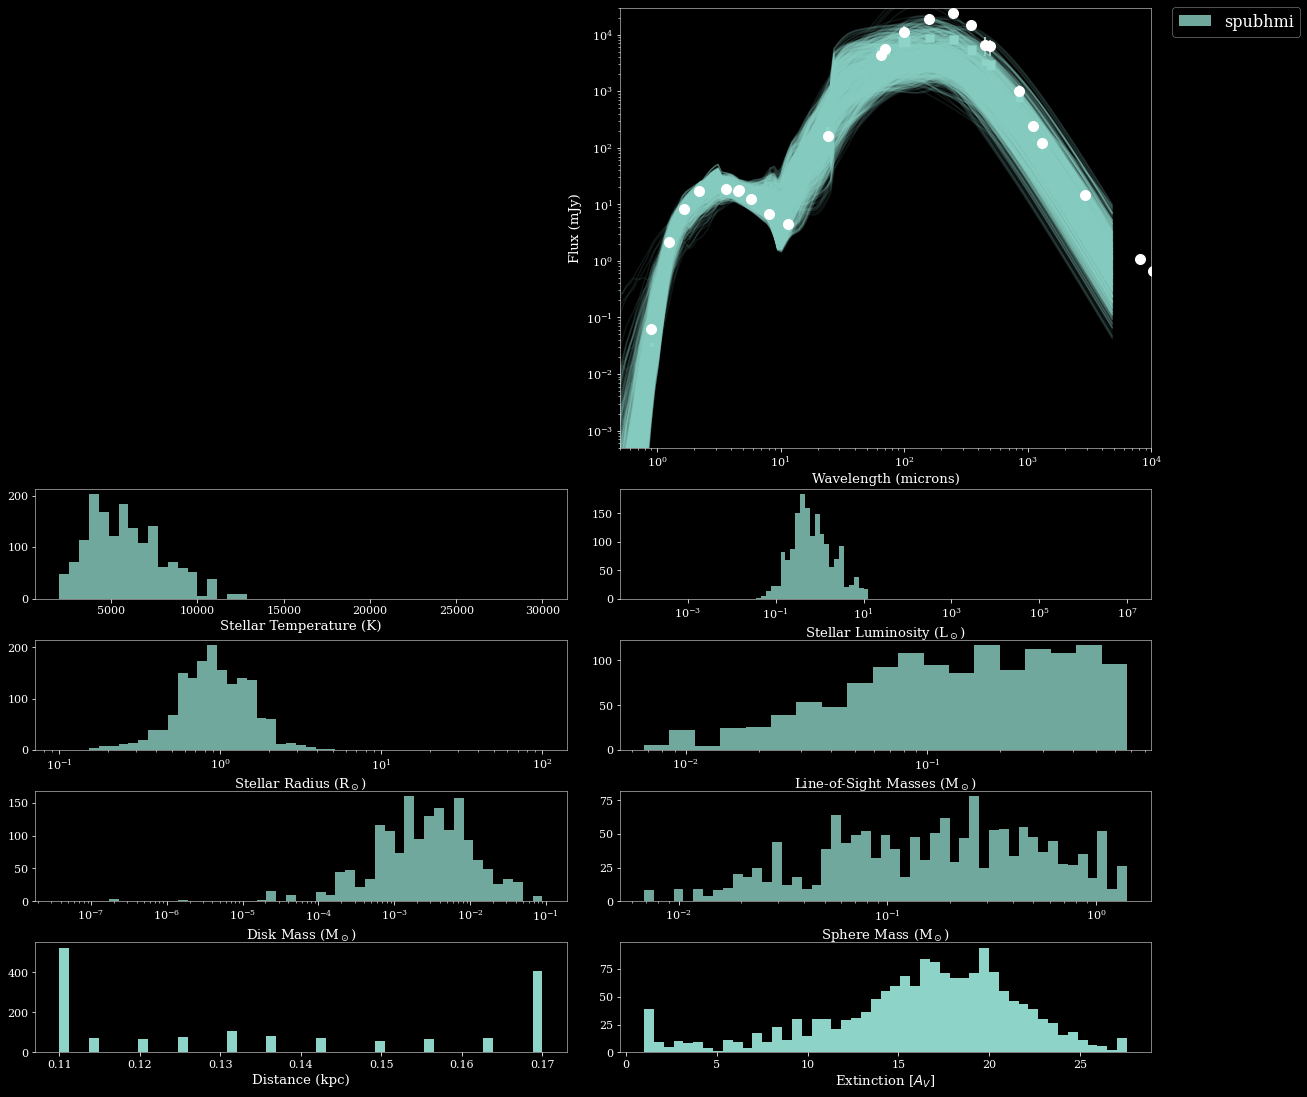

In [50]:
plot_fit(fits, ['spubhmi'], deltachi2limit=deltachi2limit,
         show_all_models=True, default_aperture=5*u.arcsec, min_chi2=minchi2)